In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [4]:
df=pd.read_csv("gene_expression.csv")

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


## Exploratory Data Analysis

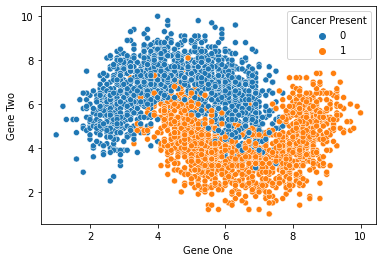

In [9]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.show()

## X and y

In [10]:
X=df.drop(columns='Cancer Present',axis=1)
y=df['Cancer Present']

## Tranin | Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
X_train

array([[ 0.91693262, -0.70989825],
       [ 0.31277553, -0.65189777],
       [-1.17015551,  0.39211086],
       ...,
       [ 0.09308204, -1.63790592],
       [ 1.46616633, -0.70989825],
       [-0.73076854,  0.62411278]])

In [16]:
y_train

19      1
369     1
2165    0
1911    0
1295    1
       ..
599     0
1599    1
1361    1
1547    1
863     0
Name: Cancer Present, Length: 2100, dtype: int64

## Modelling with default parameters (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

## Prediction

In [21]:
y_train_pred=knn_model.predict(X_train)

In [22]:
y_test_pred=knn_model.predict(X_test)

## Evaluation

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9438095238095238
0.9355555555555556


In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,X,y,cv=5)
print(scores)
print(scores.mean())

[0.91333333 0.93       0.92833333 0.93       0.93166667]
0.9266666666666665


## Choosing best K value
## Hyperparameter Tuning for KNN Classifier

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]}
full_cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

In [30]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [32]:
full_cv_classifier.best_params_

{'n_neighbors': 21, 'p': 1}

## Rebuilt KNN model with best hyper parameters

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=21,p=1)
knn_model.fit(X_train,y_train)

train_pred=knn_model.predict(X_train)
test_pred=knn_model.predict(X_test)

print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9380952380952381
0.9355555555555556


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,train_pred)

array([[1012,   65],
       [  65,  958]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

